# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


there are no null values in the dataset

# EDA

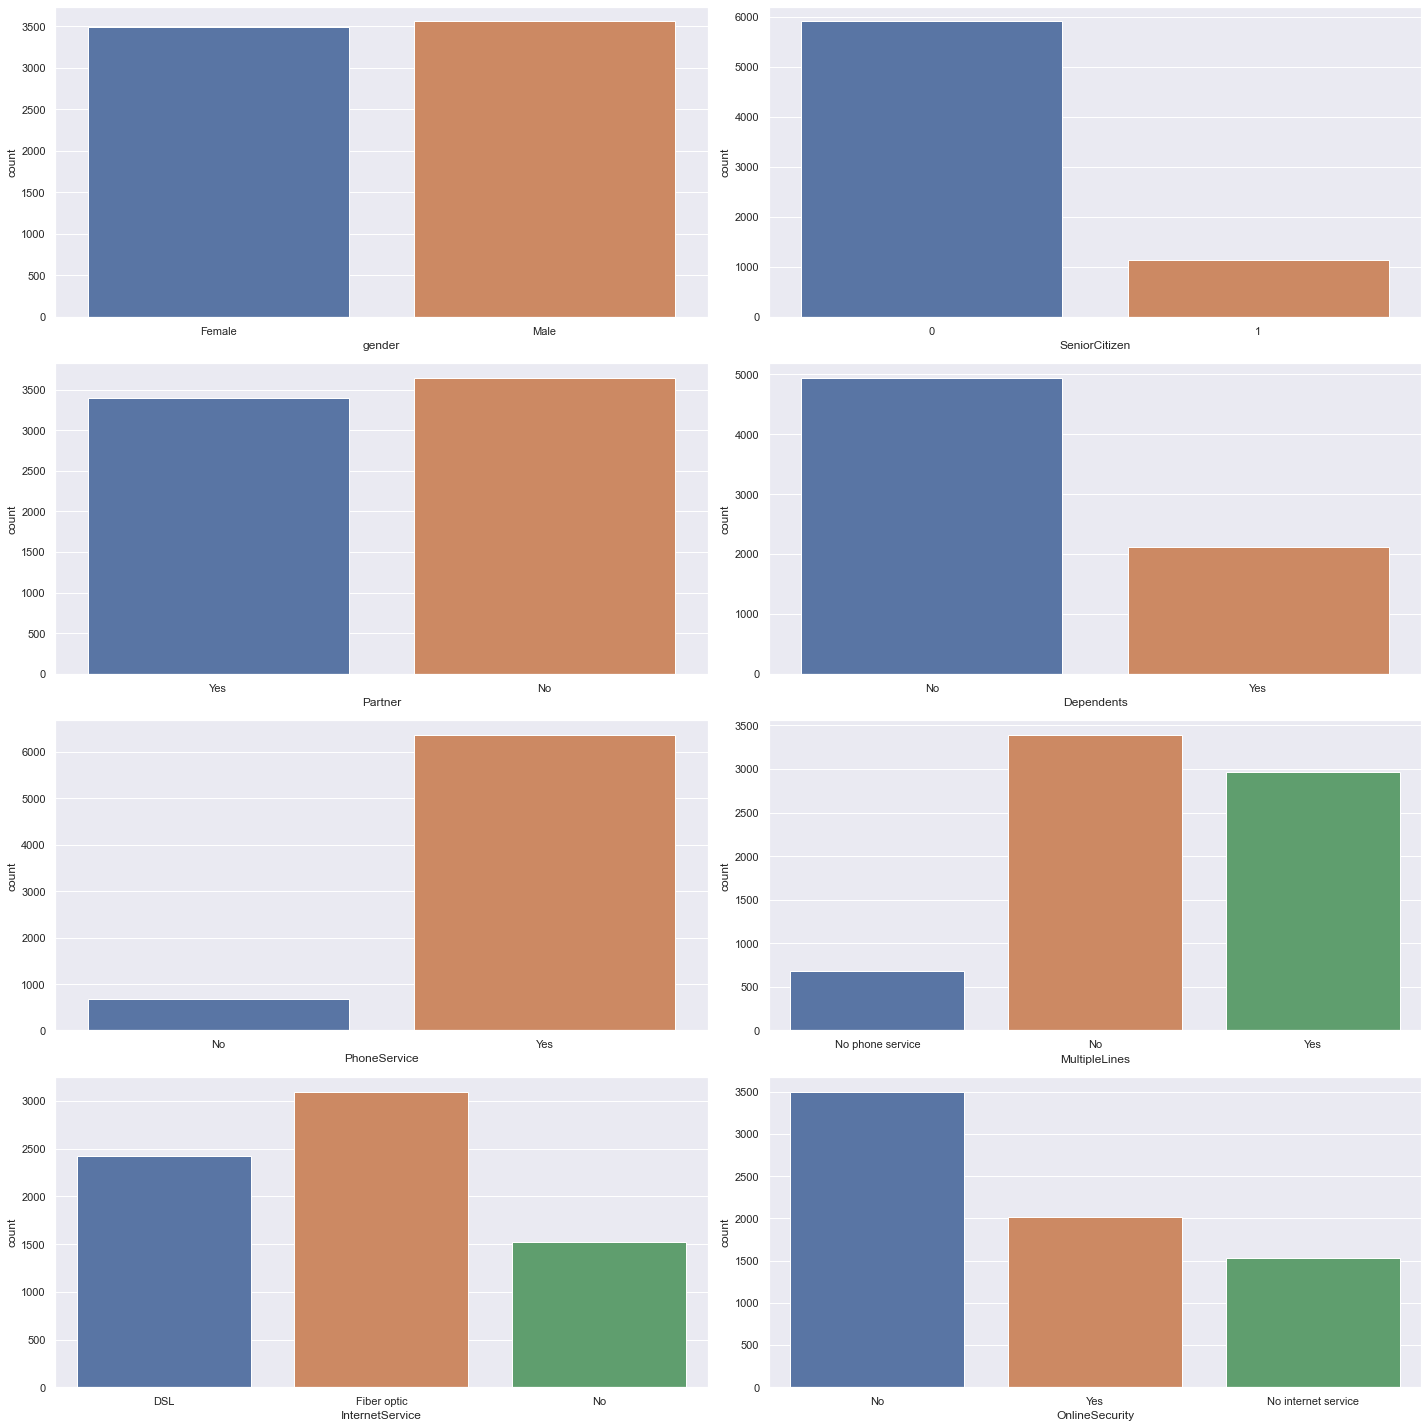

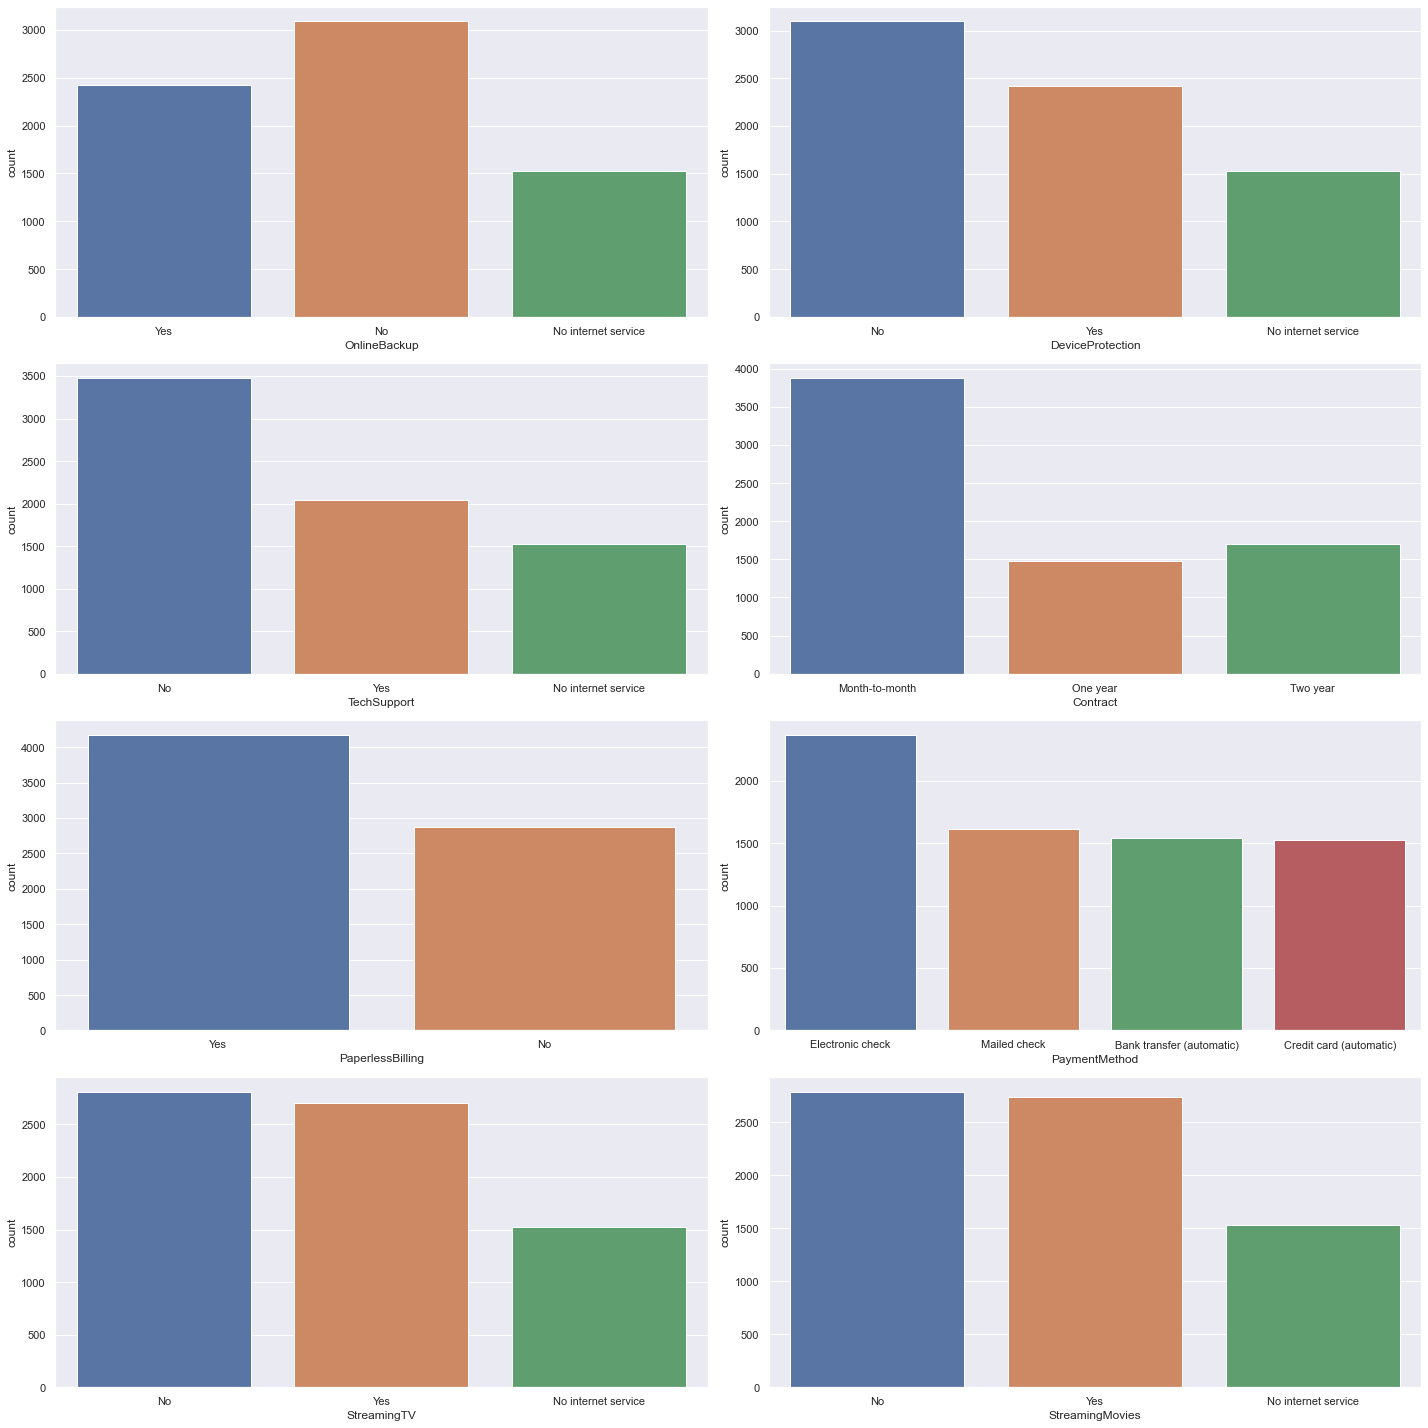

In [7]:
sns.set_theme()
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.countplot(x = df['gender'])
plt.tight_layout()
plt.subplot(4,2,2)
sns.countplot(x = df['SeniorCitizen'])
plt.tight_layout()
plt.subplot(4,2,3)
sns.countplot(x = df['Partner'])
plt.tight_layout()
plt.subplot(4,2,4)
sns.countplot(x = df['Dependents'])
plt.tight_layout()
plt.subplot(4,2,5)
sns.countplot(x = df['PhoneService'])
plt.tight_layout()
plt.subplot(4,2,6)
sns.countplot(x = df['MultipleLines'])
plt.tight_layout()
plt.subplot(4,2,7)
sns.countplot(x = df['InternetService'])
plt.tight_layout()
plt.subplot(4,2,8)
sns.countplot(x = df['OnlineSecurity'])
plt.tight_layout()
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.countplot(x = df['OnlineBackup'])
plt.tight_layout()
plt.subplot(4,2,2)
sns.countplot(x = df['DeviceProtection'])
plt.tight_layout()
plt.subplot(4,2,3)
sns.countplot(x = df['TechSupport'])
plt.tight_layout()
plt.subplot(4,2,4)
sns.countplot(x = df['Contract'])
plt.tight_layout()
plt.subplot(4,2,5)
sns.countplot(x = df['PaperlessBilling'])
plt.tight_layout()
plt.subplot(4,2,6)
sns.countplot(x = df['PaymentMethod'])
plt.tight_layout()
plt.subplot(4,2,7)
sns.countplot(x = df['StreamingTV'])
plt.tight_layout()
plt.subplot(4,2,8)
sns.countplot(x = df['StreamingMovies'])
plt.tight_layout()

In [8]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
228.4       1
7491.75     1
254.5       1
855.1       1
4103.9      1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')

In [10]:
df['TotalCharges'].isnull().sum()

11

In [11]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
#replacing missing values with median

<AxesSubplot:xlabel='TotalCharges'>

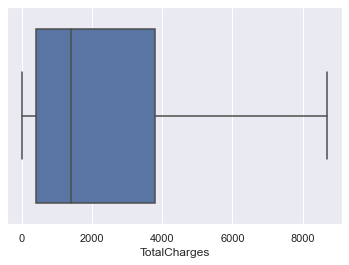

In [12]:
sns.boxplot(df['TotalCharges'])


there are no outliers in total charges column

<AxesSubplot:xlabel='MonthlyCharges'>

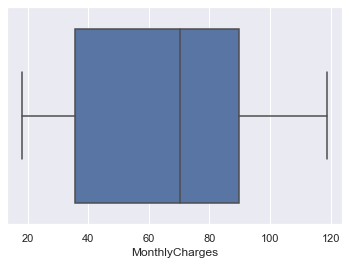

In [13]:
sns.boxplot(df['MonthlyCharges'])

no outliers

<AxesSubplot:xlabel='Churn', ylabel='count'>

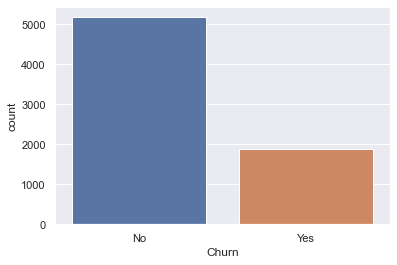

In [14]:
sns.countplot(df['Churn'])

Data is imbalanced

In [15]:
df['gender'] = df['gender'].replace({'Female':1, 'Male':0})
df['Partner'] = df['Partner'].replace({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].replace({'Yes':1, 'No':0})
df['PhoneService'] = df['PhoneService'].replace({'Yes':1, 'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes':1, 'No':0})
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for i in cols:
    df[cols] = df[cols].apply(labelencoder.fit_transform)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [19]:
df.drop(columns = ['customerID'],axis = 1,inplace = True)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<function matplotlib.pyplot.show(close=None, block=None)>

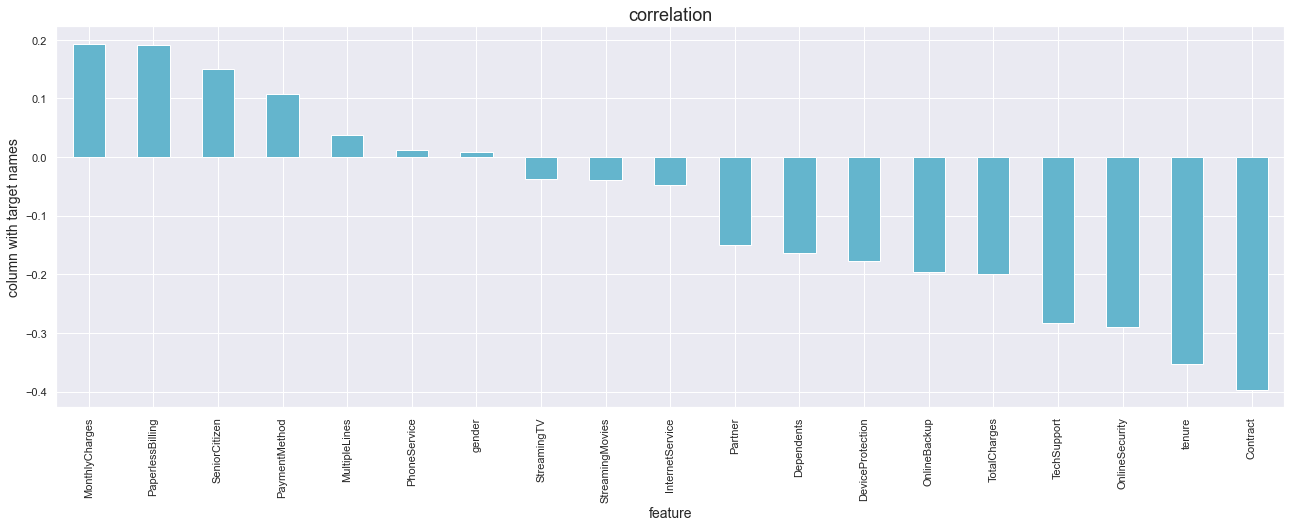

In [21]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

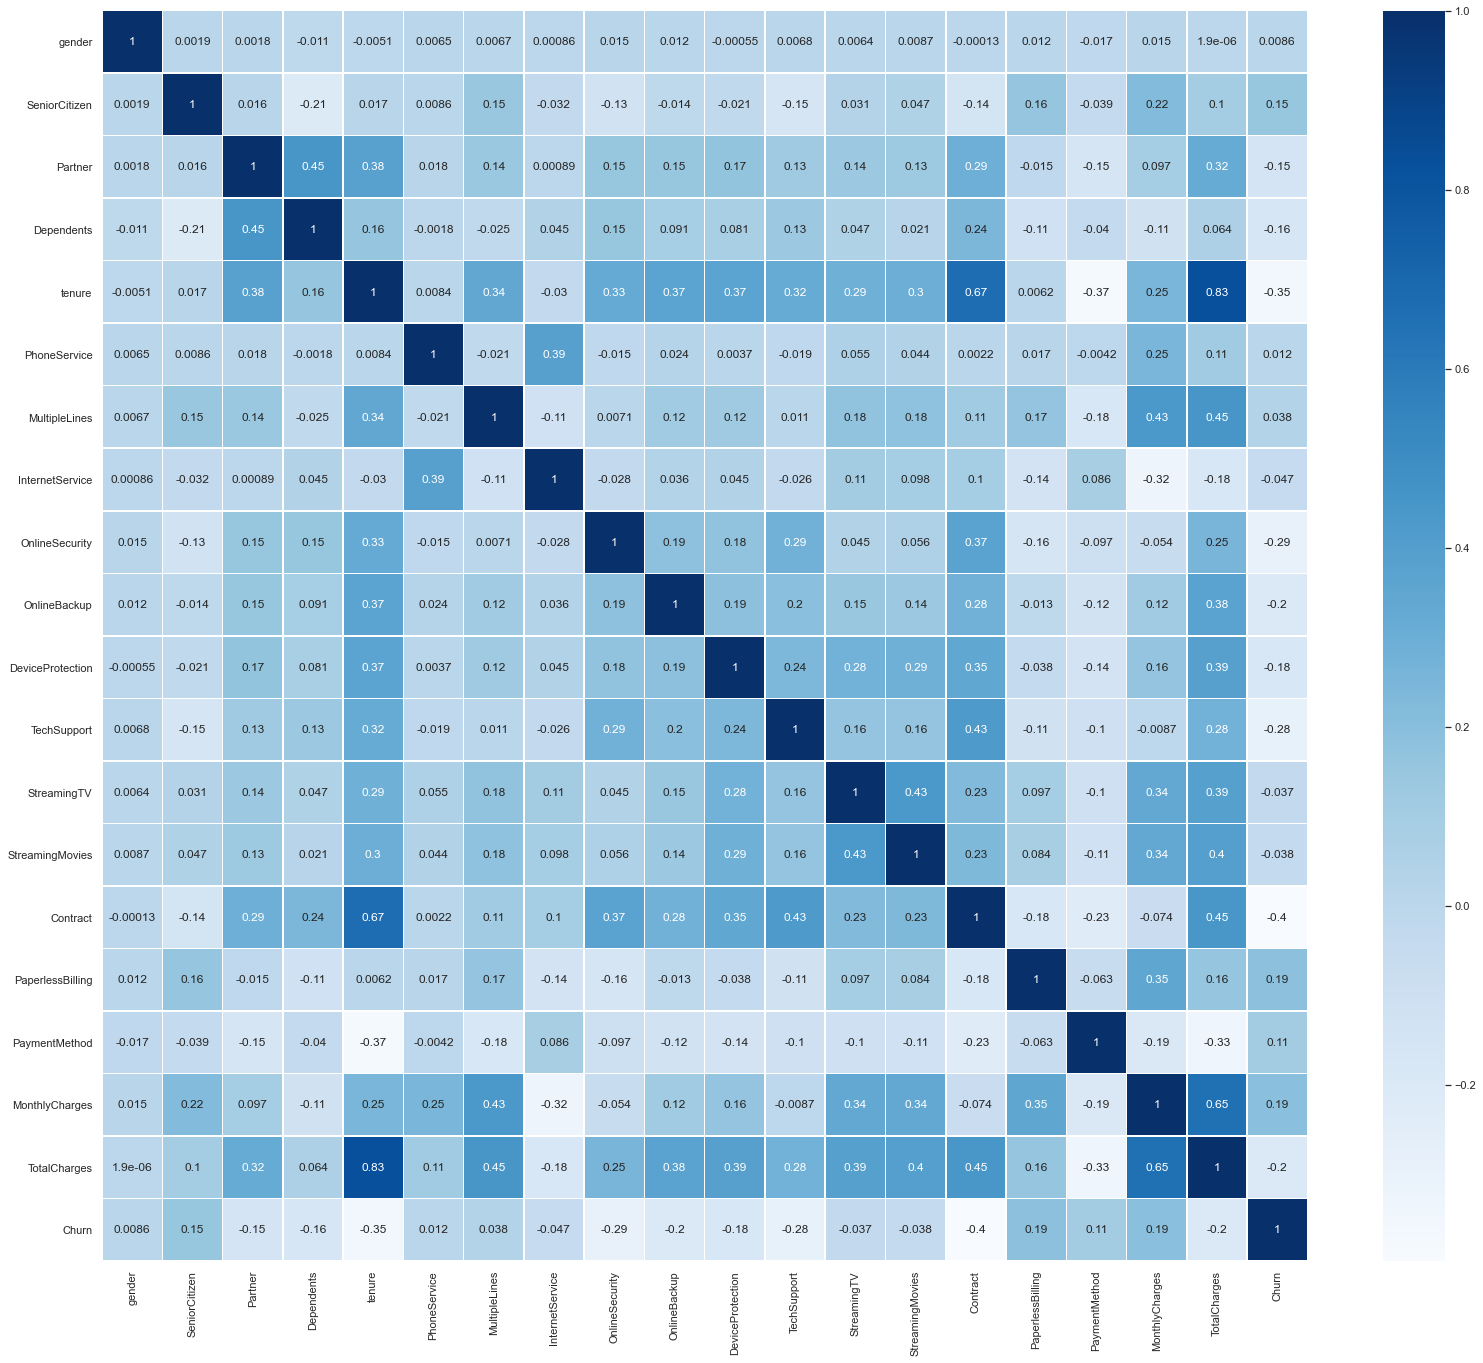

In [22]:
fig, ax = plt.subplots(figsize=(27,23))
sns.heatmap(df.corr(),cmap = 'Blues', annot=True, linewidths=.5, ax=ax)
plt.show()

In [23]:
X = df.drop(columns = ['Churn'],axis = 1)
y = df['Churn']

In [24]:

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [25]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [27]:
y.shape

(7043,)

<AxesSubplot:xlabel='Churn', ylabel='count'>

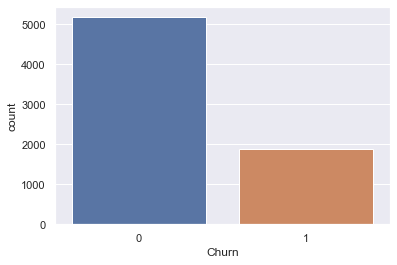

In [28]:
sns.countplot(df['Churn'])

In [32]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X , y = SM.fit_resample(X,y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

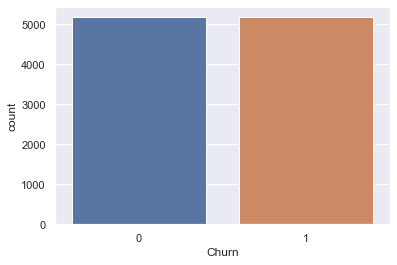

In [33]:
sns.countplot(y)


In [34]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [36]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.164979,-0.397671,1.288735,-0.522768,-1.107025,-2.902483,0.110722,-1.233692,-0.757387,1.453489,-0.898166,-0.768719,-1.032594,-1.039176,-0.641732,0.833836,0.438036,-1.324924,-0.919726
1,-0.858385,-0.397671,-0.775955,-0.522768,0.267249,0.344533,-0.973239,-1.233692,1.725958,-0.885292,1.437946,-0.768719,-1.032594,-1.039176,0.670908,-1.199277,1.440866,-0.380617,-0.069363
2,-0.858385,-0.397671,-0.775955,-0.522768,-1.065380,0.344533,-0.973239,-1.233692,1.725958,1.453489,-0.898166,-0.768719,-1.032594,-1.039176,-0.641732,0.833836,1.440866,-0.488638,-0.883922
3,-0.858385,-0.397671,-0.775955,-0.522768,0.725341,-2.902483,0.110722,-1.233692,1.725958,-0.885292,1.437946,1.699769,-1.032594,-1.039176,0.670908,-1.199277,-1.567625,-0.891101,-0.091655
4,1.164979,-0.397671,-0.775955,-0.522768,-1.065380,0.344533,-0.973239,0.241152,-0.757387,-0.885292,-0.898166,-0.768719,-1.032594,-1.039176,-0.641732,0.833836,0.438036,0.098505,-0.864031


# MOdel Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=50)

In [39]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((8278, 19), (2070, 19), (8278,), (2070,))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4133
           1       0.82      0.90      0.86      4145

    accuracy                           0.85      8278
   macro avg       0.86      0.85      0.85      8278
weighted avg       0.86      0.85      0.85      8278

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1041
           1       0.74      0.85      0.79      1029

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

AxesSubplot(0.125,0.125;0.62x0.755)


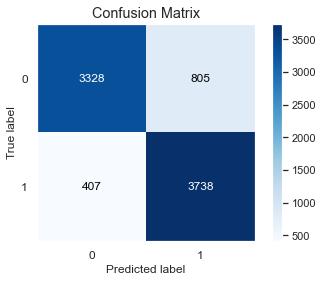

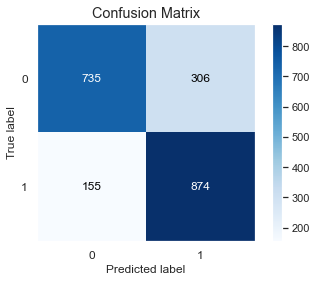

In [40]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [41]:
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

Training accuracy:: 0.8535878231456874
Test accuracy:: 0.7772946859903381


In [42]:
print(cross_val_score(KNN,x,y,cv=3).mean())

0.7791903835460253


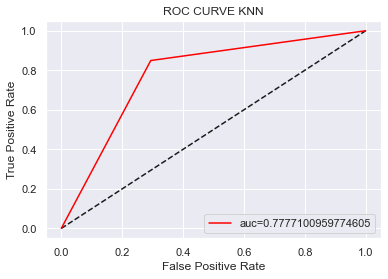

The Score for the ROC AUC Curve is : 77.77%


In [43]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='red',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4133
           1       1.00      1.00      1.00      4145

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1041
           1       0.83      0.87      0.85      1029

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

AxesSubplot(0.125,0.125;0.62x0.755)


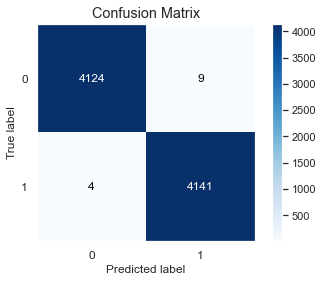

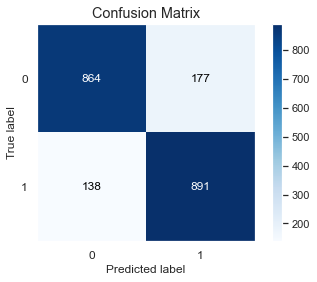

In [44]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [45]:
print("Training accuracy::",RFC.score(x_train,y_train))
print("Test accuracy::",RFC.score(x_test,y_test))

Training accuracy:: 0.9984295723604736
Test accuracy:: 0.8478260869565217


In [46]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8408505123948418


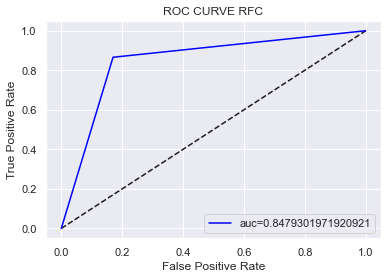

The Score for the ROC AUC Curve is : 84.78999999999999%


In [47]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='blue',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4133
           1       1.00      1.00      1.00      4145

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1041
           1       0.77      0.81      0.79      1029

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

AxesSubplot(0.125,0.125;0.62x0.755)


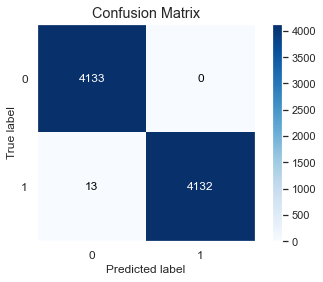

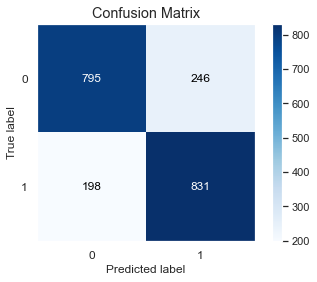

In [48]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))

#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [49]:
print("Training accuracy::",DecisionTree.score(x_train,y_train))
print("Test accuracy::",DecisionTree.score(x_test,y_test))

Training accuracy:: 0.9984295723604736
Test accuracy:: 0.7855072463768116


In [50]:
print(cross_val_score(DecisionTree,x,y,cv=5).mean())

0.7876985544604852


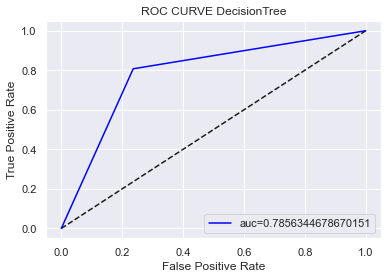

The Score for the ROC AUC Curve is : 78.56%


In [51]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='blue',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4133
           1       0.78      0.85      0.81      4145

    accuracy                           0.80      8278
   macro avg       0.81      0.80      0.80      8278
weighted avg       0.81      0.80      0.80      8278

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1041
           1       0.77      0.85      0.81      1029

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

AxesSubplot(0.125,0.125;0.62x0.755)


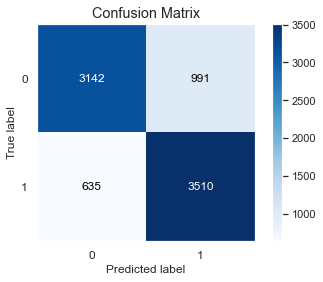

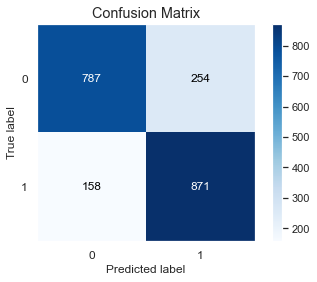

In [52]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [53]:
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

Training accuracy:: 0.8035757429330757
Test accuracy:: 0.8009661835748793


In [54]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.7947494997466629


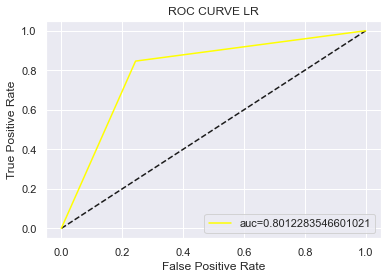

The Score for the ROC AUC Curve is : 80.12%


In [55]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='yellow',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

# ENSEMBLE TECHNIQUES

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4133
           1       0.79      0.87      0.83      4145

    accuracy                           0.82      8278
   macro avg       0.83      0.82      0.82      8278
weighted avg       0.83      0.82      0.82      8278

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1041
           1       0.78      0.88      0.83      1029

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.81      2070
weighted avg       0.82      0.82      0.81      2070

AxesSubplot(0.125,0.125;0.62x0.755)


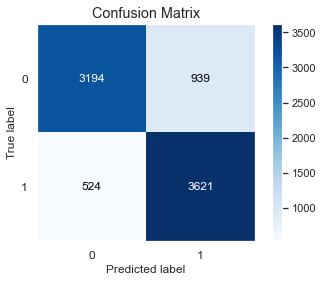

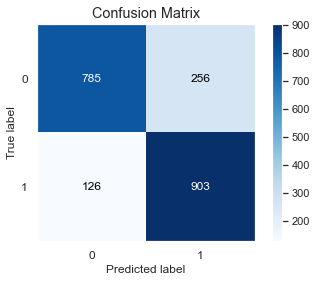

In [56]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [57]:
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.8232664894902151
Test accuracy:: 0.8154589371980676


In [58]:
print(cross_val_score(adb,x,y,cv=10).mean())

0.8140786215531822


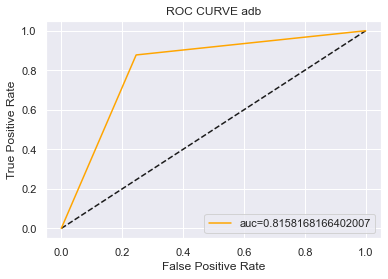

The Score for the ROC AUC Curve is : 81.58%


In [59]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='orange',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE adb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4133
           1       0.83      0.88      0.85      4145

    accuracy                           0.85      8278
   macro avg       0.85      0.85      0.84      8278
weighted avg       0.85      0.85      0.84      8278

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1041
           1       0.81      0.87      0.84      1029

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

AxesSubplot(0.125,0.125;0.62x0.755)


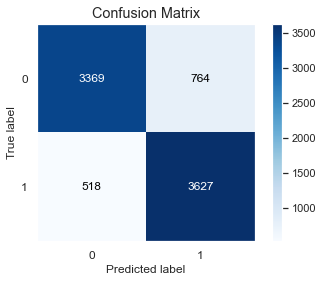

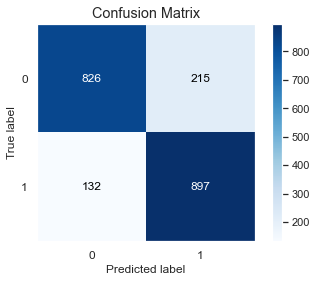

In [60]:
#train result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print( skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print( skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [61]:
print("Training accuracy::",gbc.score(x_train,y_train))
print("Test accuracy::",gbc.score(x_test,y_test))

Training accuracy:: 0.8451316743174679
Test accuracy:: 0.8323671497584542


In [62]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8207485237564882


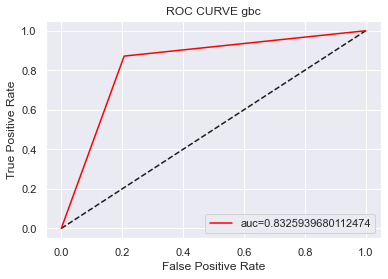

The Score for the ROC AUC Curve is : 83.26%


In [63]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='red',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE gbc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

Random forest classifier is the best model

# Hyper Prameter Tuning

In [64]:
params ={'max_depth':list(range(200,400,50)),
         'n_estimators':list(range(10,120,20)),
         'max_features': ['auto', 'sqrt', 'log2'], 
         'criterion' : ['gini','entropy'],
         }

In [65]:
grid_search=GridSearchCV(RFC,params,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [66]:

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

In [67]:
final_model=grid_search.best_estimator_
final_model

RandomForestClassifier(max_depth=350, n_estimators=110)

In [68]:
final_model=grid_search.best_params_
print(final_model)

{'criterion': 'gini', 'max_depth': 350, 'max_features': 'auto', 'n_estimators': 110}


In [69]:
final_model=grid_search.best_score_
print(final_model)

0.8434404600318169


In [70]:
final_model = RandomForestClassifier(n_estimators=90 , criterion = 'entropy', max_depth = 200, max_features = 'auto')
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.8449275362318841

In [71]:
y_pred=final_model.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred)

0.8449275362318841

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

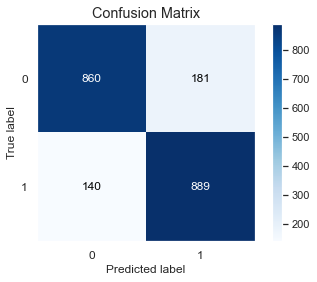

In [73]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

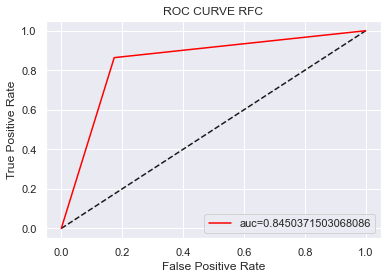

The Score for the ROC AUC Curve is : 84.5%


In [74]:

#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr,color ='red',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

85% is the best score

# Saving the model

In [76]:
import joblib
joblib.dump(final_model,"Customer_churn_prediction")

['Customer_churn_prediction']